<a href="https://colab.research.google.com/github/Staticstic/Data-Analysis-practice/blob/main/%EC%95%B1%EC%8A%A4%ED%86%A0%EC%96%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앱 스토어 데이터 분석
***

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
#AppleGothic (한글 글씨체 나눔고딕 다운로드)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font',family="NanumBarunGothic")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/bytedegree")
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/bytedegree'

In [4]:
game_all = pd.read_csv("game_all_20230404.csv")

# 데이터 전체 확인
***

In [5]:
#행과열을 확인
game_all.shape

(7834, 7)

In [6]:
#데이터 정보 확인
game_all.info()

# 숫자 : int / float (소숫점 형태)
# 문자 : object (string)
# 날짜 : datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7834 entries, 0 to 7833
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   USER    7834 non-null   object
 1   DATE    7834 non-null   object
 2   STAR    7834 non-null   int64 
 3   LIKE    7834 non-null   int64 
 4   TITLE   7834 non-null   object
 5   REVIEW  7834 non-null   object
 6   GAME    7834 non-null   object
dtypes: int64(2), object(5)
memory usage: 428.5+ KB


In [7]:
game_all.head()

,USER,DATE,STAR,LIKE,TITLE,REVIEW,GAME
0,아아거록,2023-04-02 10:08:55-07:00,5,0,ㄴㄴ,ㄷㅈㄷㅇ,가디언테일즈
1,조가리,2023-03-28 22:19:48-07:00,5,0,초보와 고수가 함께하는 화목한게임,경쟁을 부추기지 않는 게임이라 가능한 분위기\n길드 만들었는데 고수님들 들어와주셔서...,가디언테일즈
2,와구와구왕왕,2023-03-27 16:09:04-07:00,5,0,갑자기 렉이 너무 심해졌어요,다른 게임은 그대로인데 이번 업뎃에서 끊김현상부터 렉이 어마어마하네요 렉땜에 자꾸 ...,가디언테일즈
3,너너머유낳오토쥬옽,2023-03-27 05:01:02-07:00,4,0,넘 어려워요,지금 월드 12에서 막혀서 부활을 계속하는데도 안깨져요 ㅠㅠㅠ,가디언테일즈
4,아랄러로,2023-03-26 06:32:46-07:00,1,0,아이폰 14프로 맨날 튕긴다구요!!!!!!!!,아니!!!!! 맨날 들어갈때마다 튕긴다구요 퓨ㅠㅠㅠㅠㅠ\n거울균열 돌다 튕겨 카마존...,가디언테일즈


In [8]:
game_all.describe(include="object")

,USER,DATE,TITLE,REVIEW,GAME
count,7834,7834,7834,7834,7834
unique,7694,7829,6447,7400,16
top,마타도르,2023-03-29 16:02:19-07:00,굿,굿,가디언테일즈
freq,3,2,140,76,500


In [9]:
game_all.GAME.value_counts()

가디언테일즈      500
달빛조각사       500
블루아카이브      500
배틀그라운드      500
탕탕특공대       500
바람의나라연      500
검은사막        500
오딘발할라라이징    500
아키에이지워      500
미르          500
쿠키런킹덤       500
리니지m        500
리니지w        500
원신          500
우마무스메       500
프라시아전기      334
Name: GAME, dtype: int64

# 파생변수
***

In [10]:
game_all['GAME'].unique()

array(['가디언테일즈', '달빛조각사', '블루아카이브', '배틀그라운드', '탕탕특공대', '바람의나라연', '프라시아전기',
       '검은사막', '오딘발할라라이징', '아키에이지워', '미르', '쿠키런킹덤', '리니지m', '리니지w', '원신',
       '우마무스메'], dtype=object)

In [11]:
# 게임 별 유통 회사 변수 생성

def company(x):
    if x in ('가디언테일즈', '달빛조각사', '오딘발할라라이징', '아키에이지워', '우마무스메'):
      return '카카오게임즈'
    elif x in ('블루아카이브', '바람의나라연', '프라시아전기'):
      return '넥슨'
    elif x in ('리니지m', '리니지w'):
      return '엔씨소프트'
    elif x == '검은사막':
      return '펄어비스'
    elif x == '배틀그라운드':
      return '크래프톤'
    elif x == '미르':
      return '위메이드'
    elif x == '쿠키런킹덤':
      return '데브시스터즈'
    elif x == '탕탕특공대':
      return 'Habby'
    elif x == '원신':
      return 'HoYoverse'

game_all['COMPANY']=game_all['GAME'].apply(company)

In [12]:
# 게임 별 제목 수 , 리뷰 수 파생 변수 생성
game_all["제목수"]=game_all.TITLE.apply(lambda x:len(x))
game_all["리뷰수"]=game_all.REVIEW.apply(lambda x:len(x))
game_all["닉네임수"]=game_all.USER.apply(lambda x:len(x))

In [13]:
game_all

,USER,DATE,STAR,LIKE,TITLE,REVIEW,GAME,COMPANY,제목수,리뷰수,닉네임수
0,아아거록,2023-04-02 10:08:55-07:00,5,0,ㄴㄴ,ㄷㅈㄷㅇ,가디언테일즈,카카오게임즈,2,4,4
1,조가리,2023-03-28 22:19:48-07:00,5,0,초보와 고수가 함께하는 화목한게임,경쟁을 부추기지 않는 게임이라 가능한 분위기\n길드 만들었는데 고수님들 들어와주셔서...,가디언테일즈,카카오게임즈,18,74,3
2,와구와구왕왕,2023-03-27 16:09:04-07:00,5,0,갑자기 렉이 너무 심해졌어요,다른 게임은 그대로인데 이번 업뎃에서 끊김현상부터 렉이 어마어마하네요 렉땜에 자꾸 ...,가디언테일즈,카카오게임즈,15,60,6
3,너너머유낳오토쥬옽,2023-03-27 05:01:02-07:00,4,0,넘 어려워요,지금 월드 12에서 막혀서 부활을 계속하는데도 안깨져요 ㅠㅠㅠ,가디언테일즈,카카오게임즈,6,34,9
4,아랄러로,2023-03-26 06:32:46-07:00,1,0,아이폰 14프로 맨날 튕긴다구요!!!!!!!!,아니!!!!! 맨날 들어갈때마다 튕긴다구요 퓨ㅠㅠㅠㅠㅠ\n거울균열 돌다 튕겨 카마존...,가디언테일즈,카카오게임즈,25,218,4
...,...,...,...,...,...,...,...,...,...,...,...
7829,말딸 왜함 ㅋㅋ,2022-09-01 18:37:35-07:00,2,0,ㅋㅋㅋ,ㅋㅋㅋㅋ 안함,우마무스메,카카오게임즈,3,7,8
7830,리우메이,2022-09-01 18:36:22-07:00,1,0,ㅋㅋㅋㅋ,불탄다 불타,우마무스메,카카오게임즈,4,6,4
7831,NeoBlueice,2022-09-01 18:09:01-07:00,1,0,이런 운영은 처음,"몰래 공지를 수정하지 않나, 유저들이 제발 운영 좀 정상적으로 해달라는 요구에 안 ...",우마무스메,카카오게임즈,9,60,10
7832,@@#8282828,2022-09-01 17:21:51-07:00,1,0,운영 제대로좀 팅긴다,팅긴다고!! 운영 제대로 좀 해라 계속 팅기는데 업데이트 안해줌,우마무스메,카카오게임즈,11,35,10


In [14]:
# game_all["DATE"]=pd.to_datetime(game_all["DATE"])
game_all["DATE"]=pd.to_datetime(game_all["DATE"])

In [15]:
#object 형식이였던 데이터를 변경할 수 있음
game_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7834 entries, 0 to 7833
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype                                 
---  ------   --------------  -----                                 
 0   USER     7834 non-null   object                                
 1   DATE     7834 non-null   datetime64[ns, pytz.FixedOffset(-420)]
 2   STAR     7834 non-null   int64                                 
 3   LIKE     7834 non-null   int64                                 
 4   TITLE    7834 non-null   object                                
 5   REVIEW   7834 non-null   object                                
 6   GAME     7834 non-null   object                                
 7   COMPANY  7834 non-null   object                                
 8   제목수      7834 non-null   int64                                 
 9   리뷰수      7834 non-null   int64                                 
 10  닉네임수     7834 non-null   int64                              

In [16]:
#파생변수 생성 (데이터 추출)
game_all["month"]=game_all["DATE"].dt.month
game_all["day"]=game_all["DATE"].dt.day
game_all["hour"]=game_all["DATE"].dt.hour
game_all["minute"]=game_all["DATE"].dt.minute
# 0:월 ~ 6:일
game_all["day_name"]=game_all['DATE'].dt.weekday

In [17]:
# 요일 한글로 적용하는 법
weekday_list=['월', '화', '수', '목', '금', '토', '일']
game_all['요일']=game_all.apply(lambda x: weekday_list[x['day_name']], axis=1)

In [18]:
game_all.head()

,USER,DATE,STAR,LIKE,TITLE,REVIEW,GAME,COMPANY,제목수,리뷰수,닉네임수,month,day,hour,minute,day_name,요일
0,아아거록,2023-04-02 10:08:55-07:00,5,0,ㄴㄴ,ㄷㅈㄷㅇ,가디언테일즈,카카오게임즈,2,4,4,4,2,10,8,6,일
1,조가리,2023-03-28 22:19:48-07:00,5,0,초보와 고수가 함께하는 화목한게임,경쟁을 부추기지 않는 게임이라 가능한 분위기\n길드 만들었는데 고수님들 들어와주셔서...,가디언테일즈,카카오게임즈,18,74,3,3,28,22,19,1,화
2,와구와구왕왕,2023-03-27 16:09:04-07:00,5,0,갑자기 렉이 너무 심해졌어요,다른 게임은 그대로인데 이번 업뎃에서 끊김현상부터 렉이 어마어마하네요 렉땜에 자꾸 ...,가디언테일즈,카카오게임즈,15,60,6,3,27,16,9,0,월
3,너너머유낳오토쥬옽,2023-03-27 05:01:02-07:00,4,0,넘 어려워요,지금 월드 12에서 막혀서 부활을 계속하는데도 안깨져요 ㅠㅠㅠ,가디언테일즈,카카오게임즈,6,34,9,3,27,5,1,0,월
4,아랄러로,2023-03-26 06:32:46-07:00,1,0,아이폰 14프로 맨날 튕긴다구요!!!!!!!!,아니!!!!! 맨날 들어갈때마다 튕긴다구요 퓨ㅠㅠㅠㅠㅠ\n거울균열 돌다 튕겨 카마존...,가디언테일즈,카카오게임즈,25,218,4,3,26,6,32,6,일


In [19]:
#그냥 하면 인코딩이 안되어있어서 한글도 알파벳으로 나올 수 있기 때문에 encode를 필수적으로 진행해야된다.

#lambda(x : (결과1) if (조건) else (결과2))

game_all["nickname_alpha"]=game_all.USER.apply(lambda x: "alpha" if x.encode().isalpha() else "not")

In [20]:
#- 전체 글자 별 제목 비율
game_all["all_text_data_length"]=game_all["제목수"]+game_all["리뷰수"]

# 전체 게임 데이터 분석
***

In [21]:
#게임 별 게임사 분포 확인
game_all.groupby('COMPANY')['GAME'].nunique().to_frame().reset_index()

,COMPANY,GAME
0,Habby,1
1,HoYoverse,1
2,넥슨,3
3,데브시스터즈,1
4,엔씨소프트,2
5,위메이드,1
6,카카오게임즈,5
7,크래프톤,1
8,펄어비스,1


In [22]:
#게임사별 게임들의 리뷰 평균 구하기
company_star=game_all.groupby('COMPANY')['STAR'].mean().to_frame().reset_index()
company_star

,COMPANY,STAR
0,Habby,3.518000
1,HoYoverse,4.248000
2,넥슨,2.643928
3,데브시스터즈,3.570000
4,엔씨소프트,1.837000
5,위메이드,2.200000
6,카카오게임즈,3.123200
7,크래프톤,2.750000
8,펄어비스,4.490000


Text(0, 0.5, '평점')

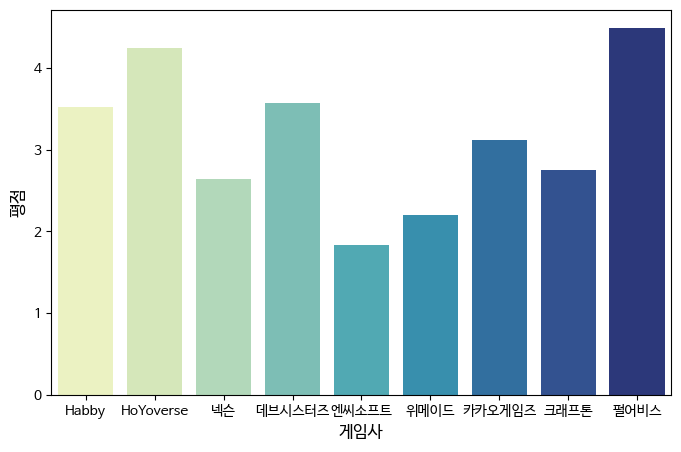

In [23]:
plt.figure(figsize=(8, 5))
c_p=sns.barplot(x="COMPANY", y="STAR", data=company_star,  palette='YlGnBu')
c_p.set_xlabel("게임사", fontsize = 12)
c_p.set_ylabel("평점", fontsize = 12)

In [24]:
game_star=game_all.groupby('GAME')['STAR'].mean().to_frame().reset_index()
game_star

,GAME,STAR
0,가디언테일즈,3.342000
1,검은사막,4.490000
2,달빛조각사,3.478000
3,리니지m,1.828000
4,리니지w,1.846000
5,미르,2.200000
6,바람의나라연,1.878000
7,배틀그라운드,2.750000
8,블루아카이브,3.358000
9,아키에이지워,3.462000


Text(0, 0.5, '평점')

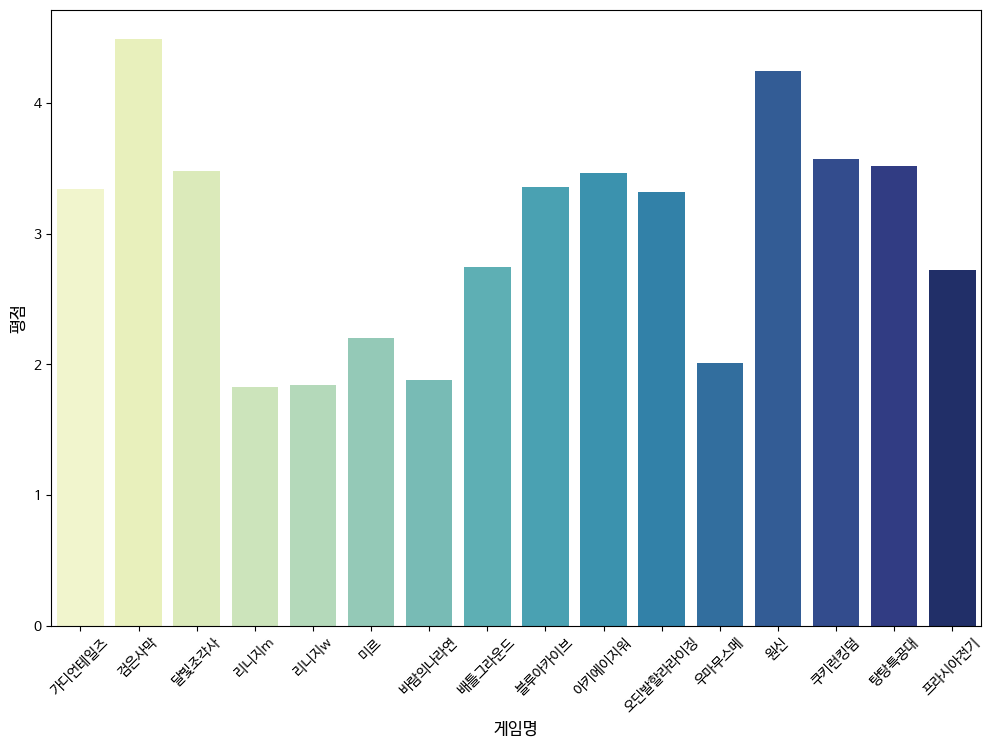

In [25]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
g_p=sns.barplot(x="GAME", y="STAR", data=game_star,  palette='YlGnBu')
g_p.set_xlabel("게임명", fontsize = 12)
g_p.set_ylabel("평점", fontsize = 12)

In [26]:
# round(숫자,자릿수) : 자릿수 까지 남기고 다음 자릿수에서 반올림한다.

# {0} , {1} .format(1,2)
# %s : 문자 %d :정수 %f : 실수 , %(값)

print("전체 게임 평균 평점 {0}".format(round(game_all["STAR"].mean(),2)))
print("전체 게임 평균 평점 %f "%(round(game_all["STAR"].mean(),2)))

전체 게임 평균 평점 3.01
전체 게임 평균 평점 3.010000 


In [27]:
#len(game_all[game_all["LIKE"]>0]) : like수가 0 초과인 애들에 대한 수
#len(game_all) : 행의 수


print("전체 좋아요를 받은 전체 댓글 비율 {0}%".format(round(len(game_all[game_all["LIKE"]>0])/len(game_all)*100,2)))

전체 좋아요를 받은 전체 댓글 비율 2.71%


In [28]:
game_all[game_all["LIKE"]>0].GAME.value_counts()

쿠키런킹덤       44
원신          42
미르          28
가디언테일즈      17
블루아카이브      14
리니지m        12
우마무스메       11
달빛조각사        9
배틀그라운드       8
바람의나라연       8
리니지w         7
탕탕특공대        5
검은사막         4
오딘발할라라이징     2
프라시아전기       1
Name: GAME, dtype: int64

## 좋아요가 있는 데이터 확인

## 데이터의 상관관계 확인
***

In [29]:
game_corr=game_all.corr()

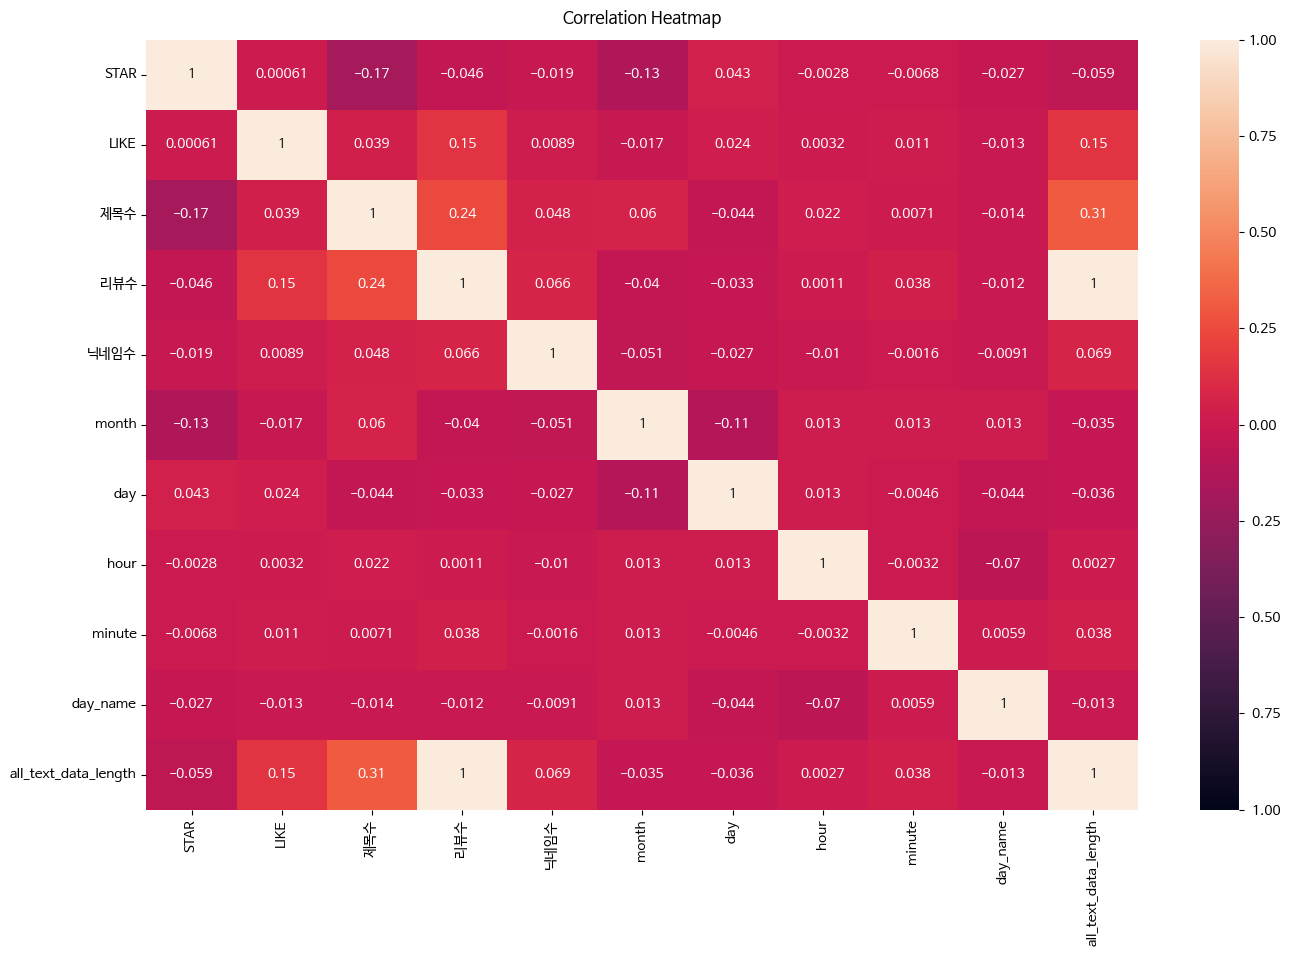

In [30]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(game_all.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


#plotly -> 시각화 패키지 -> 한글 호환

## 긍정 데이터 / 부정 데이터 비율 확인

In [31]:
game_all.groupby('COMPANY')['STAR'].describe()

,count,mean,std,min,25%,50%,75%,max
COMPANY,,,,,,,,
Habby,500.0,3.518000,1.745787,1.0,1.0,5.0,5.0,5.0
HoYoverse,500.0,4.248000,1.398000,1.0,4.0,5.0,5.0,5.0
넥슨,1334.0,2.643928,1.787232,1.0,1.0,2.0,5.0,5.0
데브시스터즈,500.0,3.570000,1.585600,1.0,2.0,4.0,5.0,5.0
엔씨소프트,1000.0,1.837000,1.508876,1.0,1.0,1.0,2.0,5.0
위메이드,500.0,2.200000,1.695213,1.0,1.0,1.0,4.0,5.0
카카오게임즈,2500.0,3.123200,1.874200,1.0,1.0,4.0,5.0,5.0
크래프톤,500.0,2.750000,1.739411,1.0,1.0,2.0,5.0,5.0
펄어비스,500.0,4.490000,1.129802,1.0,5.0,5.0,5.0,5.0


In [32]:
positive_review=game_all[game_all["STAR"]>3]
negative_review=game_all[game_all["STAR"]<=3]

In [33]:
len(positive_review)

3721

In [34]:
len(negative_review)

4113

In [35]:
game_all["STAR_posneg"]=game_all.STAR.apply(lambda x: "pos" if x>3 else "neg")

In [36]:
positive_review.mean()

STAR                     4.860521
LIKE                     0.041655
제목수                      8.188659
리뷰수                     58.146466
닉네임수                     5.971513
month                    4.933889
day                     17.190809
hour                    10.817522
minute                  29.312282
day_name                 2.793066
all_text_data_length    66.335125
dtype: float64

In [37]:
negative_review.mean()

STAR                     1.330902
LIKE                     0.038172
제목수                     10.742281
리뷰수                     66.265257
닉네임수                     6.096280
month                    5.801848
day                     16.465840
hour                    10.877948
minute                  29.465111
day_name                 2.903963
all_text_data_length    77.007537
dtype: float64

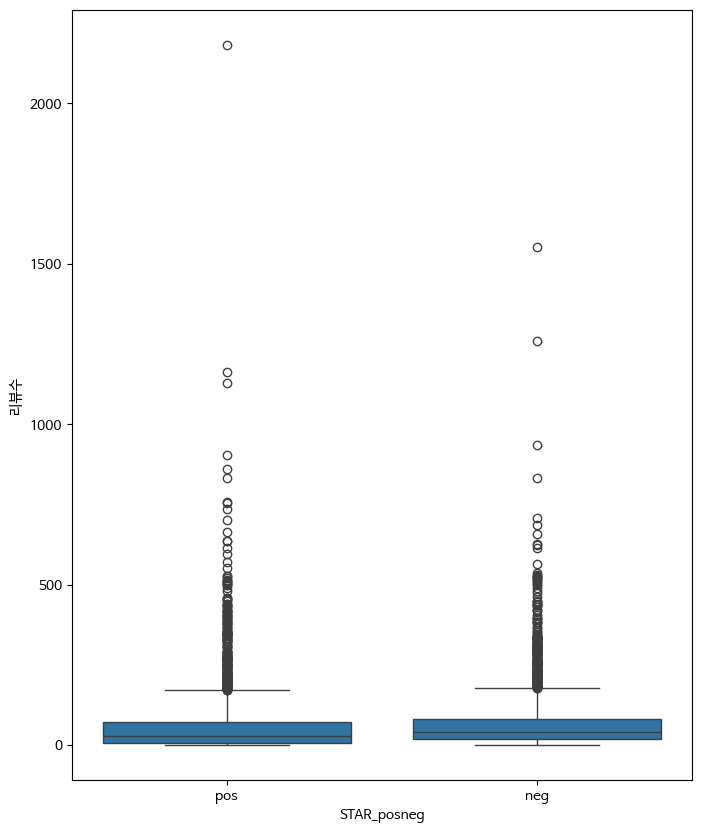

In [38]:
plt.figure(figsize=(8,10))
sns.boxplot(y = "리뷰수", x="STAR_posneg",data =game_all)
plt.show()

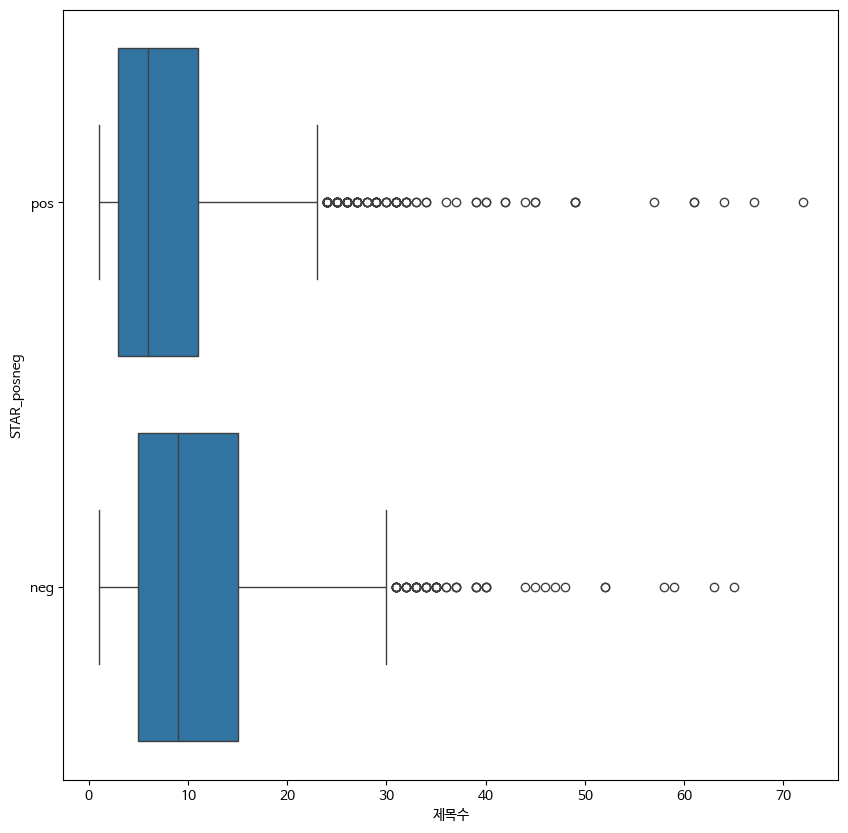

In [39]:
plt.figure(figsize=(10,10))
sns.boxplot(x= "제목수", y="STAR_posneg",data =game_all)
plt.savefig('temp.jpg')
plt.show()


# 시간 별 데이터 분석
***

In [40]:
def data_groupby_time(column_name):
  data_all=game_all.groupby(column_name).count().reset_index()[[column_name,"TITLE"]]
  return data_all

In [41]:
day_table=data_groupby_time("day")
month_table=data_groupby_time("month")
hour_table=data_groupby_time("hour")
minute_table=data_groupby_time("minute")

<Axes: xlabel='day', ylabel='TITLE'>

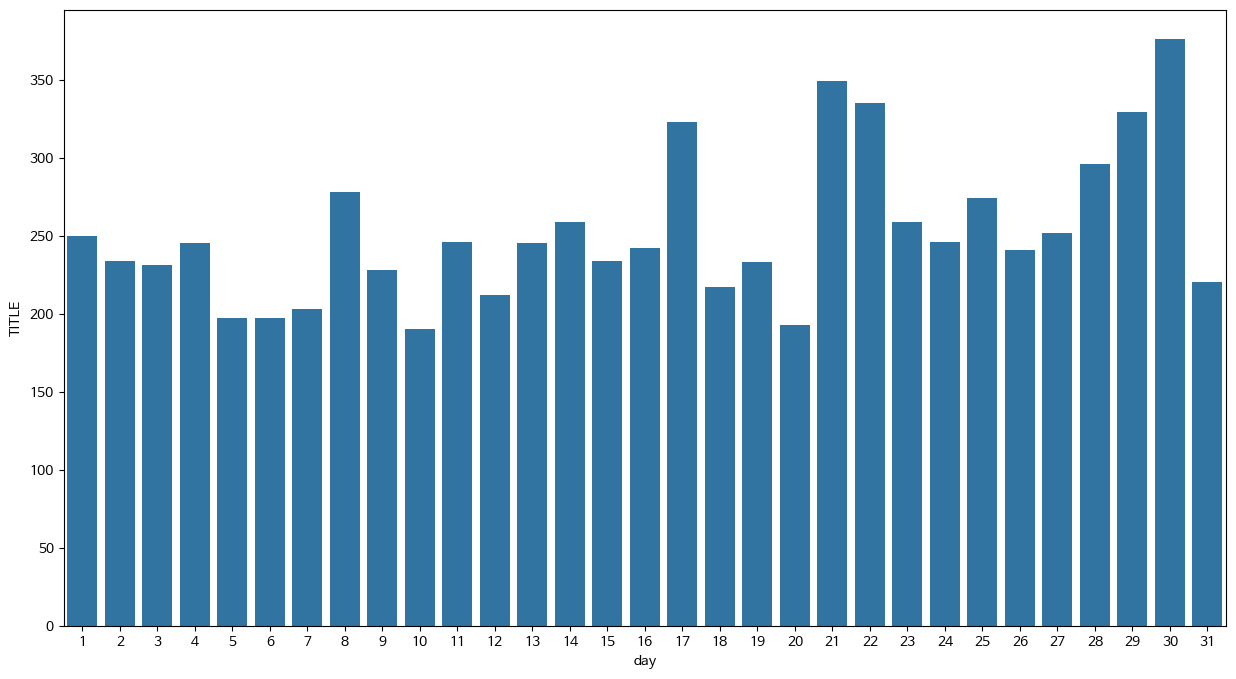

In [42]:
plt.figure(figsize=(15,8))
sns.barplot(x="day", y="TITLE",data=day_table)

<Axes: xlabel='month', ylabel='TITLE'>

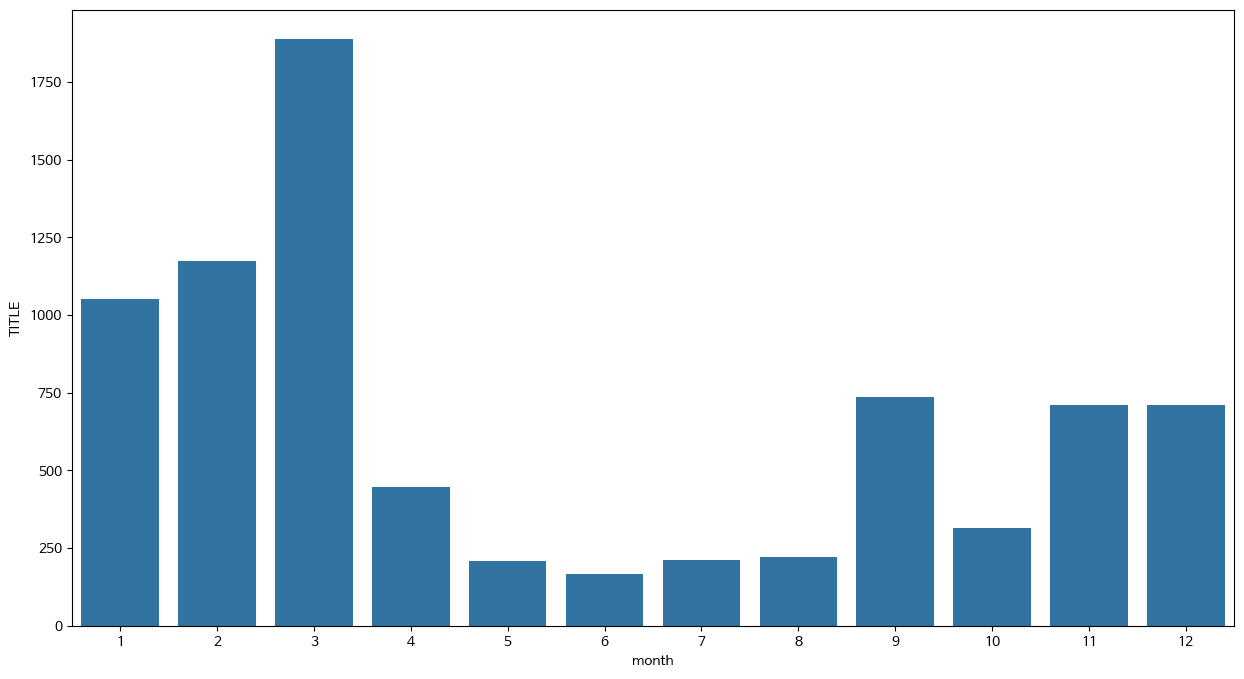

In [43]:
plt.figure(figsize=(15,8))
sns.barplot(x="month", y="TITLE",data=month_table)

<Axes: xlabel='hour', ylabel='TITLE'>

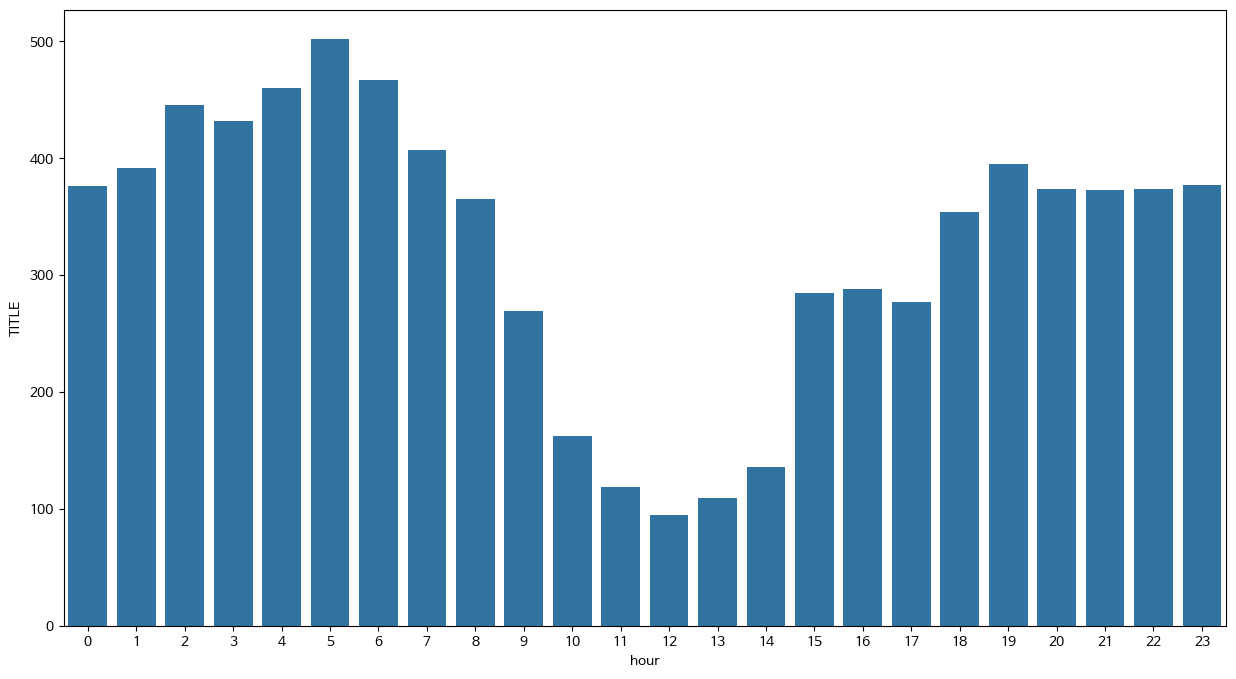

In [44]:
plt.figure(figsize=(15,8))
sns.barplot(x="hour", y="TITLE",data=hour_table)

<Axes: xlabel='minute', ylabel='TITLE'>

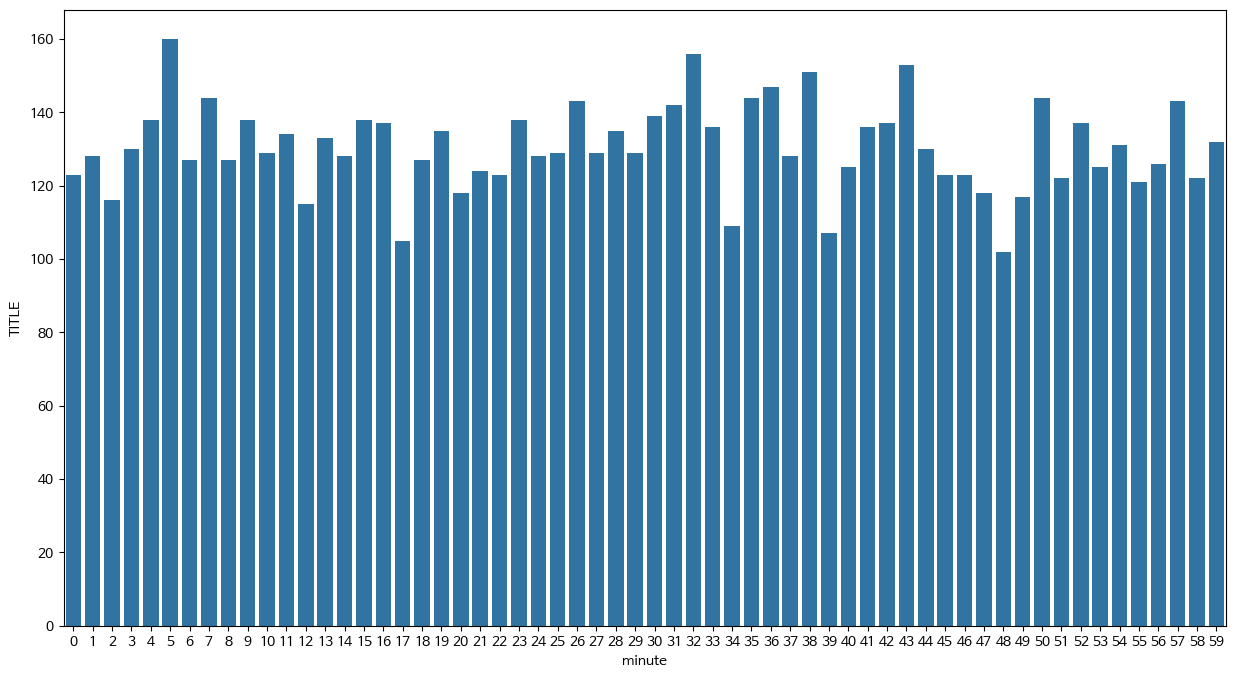

In [45]:
plt.figure(figsize=(15,8))
sns.barplot(x="minute", y="TITLE",data=minute_table)

## 닉네임 별 데이터 수
***

In [46]:
game_all.groupby("USER").count().reset_index()[["USER","DATE"]].sort_values(by=["DATE"],ascending=False).head(10)

,USER,DATE
1039,hadigreece,3
2204,고농,3
2788,냉정평가맨,3
3586,마타도르,3
6231,전략맨,3
1361,qwarde,2
4023,발키리뮤즈,2
7264,하라니지라,2
6820,컷백,2
3724,면도오,2


In [47]:
# 같은 닉네임을 가지고 있으면 한 유저라고 가정
same_nickname=game_all.groupby("USER").count().reset_index()[["USER","DATE"]].sort_values(by=["DATE"],ascending=False)

In [48]:
str(round(len(same_nickname[same_nickname["DATE"]>1])/len(game_all)*100,2))+"%"

'1.72%'

In [49]:
same_nickname.head()

,USER,DATE
1039,hadigreece,3
2204,고농,3
2788,냉정평가맨,3
3586,마타도르,3
6231,전략맨,3


In [50]:
game_all[game_all["USER"]=="애옹 나 고양이"][["STAR","REVIEW","GAME"]]

,STAR,REVIEW,GAME
1253,3,3성떠도 픽업캐가 안나옴…뭐 가끔 운 정말 좋으면 픽업캐가 나오긴하지만 10번 뽑으...,블루아카이브
7558,1,판 다 깔아줘도 운영 ㅈㄴ못함\n그냥 섭종해라ㅋㅋ,우마무스메


# 전체 글자 별 제목 비율
***

In [51]:
game_all["제목 차지비율"]=game_all["제목수"]/game_all["all_text_data_length"]*100

In [52]:
game_all["제목 차지비율"].describe()

count    7834.000000
mean       24.835489
std        20.100002
min         0.196464
25%         9.090909
50%        18.604651
75%        35.714286
max        98.484848
Name: 제목 차지비율, dtype: float64

In [53]:
game_all_1000=game_all.sort_values(by=["all_text_data_length"],ascending=False).head(1000)
game_all_1000.STAR.mean()

2.954

## 게임 별 데이터 분석
***

In [54]:
game_all.GAME.value_counts()

가디언테일즈      500
달빛조각사       500
블루아카이브      500
배틀그라운드      500
탕탕특공대       500
바람의나라연      500
검은사막        500
오딘발할라라이징    500
아키에이지워      500
미르          500
쿠키런킹덤       500
리니지m        500
리니지w        500
원신          500
우마무스메       500
프라시아전기      334
Name: GAME, dtype: int64

In [55]:
#게임 별 평균 스타 수 확인
game_all_meanstar=game_all.groupby("GAME").mean().reset_index()[["GAME","STAR"]]

<Axes: xlabel='GAME', ylabel='STAR'>

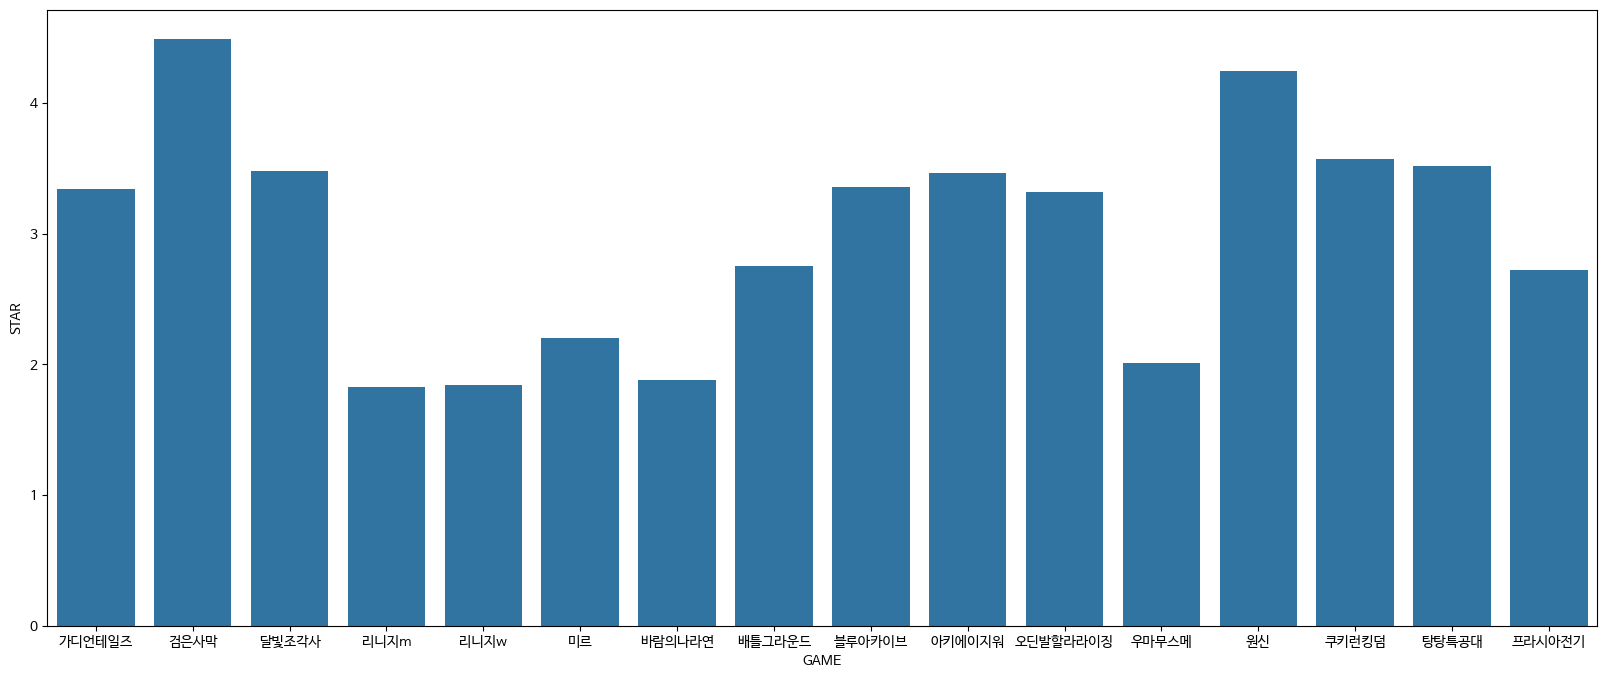

In [56]:
plt.figure(figsize=(20,8))
sns.barplot(x="GAME", y="STAR",data=game_all_meanstar)

In [57]:
game_all_meanstar

,GAME,STAR
0,가디언테일즈,3.342000
1,검은사막,4.490000
2,달빛조각사,3.478000
3,리니지m,1.828000
4,리니지w,1.846000
5,미르,2.200000
6,바람의나라연,1.878000
7,배틀그라운드,2.750000
8,블루아카이브,3.358000
9,아키에이지워,3.462000


#워드클라우딩

In [58]:
pip install konlpy

In [59]:
# *- encoding: utf-8 -*- 패키지 불러오는 작업
import json
import ast
import sys
import re #정규 표현식 가지고 오는 패키지
from konlpy.tag import Twitter
from konlpy.tag import Komoran
from konlpy.tag import Kkma

In [60]:
# 토큰화 : 쪼개는거
# 태깅 : 명사 , 동사 구분해주는 것  ( 명사,동사 or 명사 형용사)
# 빈도
# 어린왕자 : 8 , 떡 : 10 ,
# 글씨크기가 달라지고 - > 워드 클라우드

In [61]:
game_all["ALL_TEXT"]=game_all["TITLE"]+game_all["REVIEW"]

In [62]:
game_data_text=game_all["ALL_TEXT"].tolist()

In [63]:
#tokenizer-> word 토큰화
#pos tagging okt
#pos tagging -> pos (품사), tagging(붙여주는 )
#stop word -> 불용어

ff=open('텍스트데이터.txt','w')

from konlpy.tag import Okt
okt=Okt() #함수 이름 새롭게 정의
documents1=[]


def tokenizer(raw, pos=["Noun"], stopword=["게임"]):
    return [
        word for word, tag in okt.pos( #okt.pos 태깅을 해서 word  사람 tag Adverb
            raw,
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

documents1=tokenizer(str(game_data_text))
print(documents1)

for b in range(0,len(documents1)):
    fb=documents1[b]
    ff.write('%s \n'%fb)

ff.close()

['초보', '고수', '화목', '한게임', '경쟁', '분위기', '길드', '고수', '운영', '갑자기', '다른', '그대로', '이번', '업뎃', '현상', '렉땜', '자꾸', '캐릭', '지금', '월드', '부활', '계속', '아이폰', '프로', '거울', '균열', '튕겨', '카마', '결과', '튕겨', '레이드', '튕겨', '스토리', '튕겨', '보스', '튕겨', '하라', '고요', '진짜', '리뷰', '한숨', '리뷰', '소액', '현질', '욀케', '스토리', '진짜', '굿겜', '문제점', '스코겜', '스토리', '난이도', '정도', '스토리', '진행', '진화', '노가다', '문제점', '확률', '쓰레기', '무기', '전용', '무기', '하나', '문제점', '크리스탈', '내용', '관련', '문제', '고치', '문제', '카카오', '쥐꼬리', '만큼', '저희', '과금', '유저', '유저', '차이', '마지막', '스토리', '시작', '스토리', '문제', '때문', '준비', '개발자', '제발', '문제', '해결', '닌텐도', '핸드폰', '다운', '리뷰', '진짜', '이번', '주말', '땜시', '주말', '도둑', '책임', '진짜', '섭종', '진짜', '섭종', '진짜', '지금', '추천', '사가', '스토리', '밀고', '테꿀잼', '집대성', '치뷰', '리뷰', '확률', '확정', '소환', '확률', '망겜', '데기', '다이아', '삽구', '데기', '와중', '친구', '몇개', '계정', '삭제', '박움', '진짜', '캐릭터', '개성', '스토리', '방식', '무엇', '부족함', '계속', '순간', '방치', '캐릭터', '베스', '때문', '무용지물', '무언', '압박', '진짜', '주말', '오전', '시작', '지금', '오후', '폰겜', '해도', '진짜', '콘솔', '그냥', '비판', '리뷰', '대부분', '

In [64]:
# pos tagging, tag 종류 확인
# Adjective Noun Verb 주로 사용
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [65]:
import csv, sys
import numpy as np
# tf , tf-idf -> sklearn tf -> countVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [66]:
openFileName = '텍스트데이터.txt'

f = open(openFileName, 'r')
data = f.read()
f.close()

In [67]:
data = [data]
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [68]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'초보': 25,
 '고수': 8,
 '화목': 1,
 '한게임': 22,
 '경쟁': 20,
 '분위기': 7,
 '길드': 32,
 '운영': 427,
 '갑자기': 152,
 '다른': 194,
 '그대로': 67,
 '이번': 142,
 '업뎃': 148,
 '현상': 207,
 '렉땜': 1,
 '자꾸': 259,
 '캐릭': 123,
 '지금': 264,
 '월드': 50,
 '부활': 15,
 '계속': 572,
 '아이폰': 937,
 '프로': 106,
 '거울': 1,
 '균열': 5,
 '튕겨': 227,
 '카마': 1,
 '결과': 21,
 '레이드': 24,
 '스토리': 399,
 '보스': 78,
 '하라': 129,
 '고요': 19,
 '진짜': 762,
 '리뷰': 244,
 '한숨': 7,
 '소액': 8,
 '현질': 395,
 '욀케': 1,
 '굿겜': 5,
 '문제점': 16,
 '스코겜': 1,
 '난이도': 60,
 '정도': 281,
 '진행': 185,
 '진화': 9,
 '노가다': 36,
 '확률': 247,
 '쓰레기': 156,
 '무기': 83,
 '전용': 6,
 '하나': 296,
 '크리스탈': 20,
 '내용': 29,
 '관련': 37,
 '문제': 298,
 '고치': 24,
 '카카오': 162,
 '쥐꼬리': 1,
 '만큼': 8,
 '저희': 12,
 '과금': 613,
 '유저': 906,
 '차이': 39,
 '마지막': 36,
 '시작': 313,
 '때문': 198,
 '준비': 17,
 '개발자': 106,
 '제발': 400,
 '해결': 217,
 '닌텐도': 5,
 '핸드폰': 78,
 '다운': 146,
 '주말': 7,
 '땜시': 2,
 '도둑': 7,
 '책임': 7,
 '섭종': 15,
 '추천': 90,
 '사가': 20,
 '밀고': 8,
 '테꿀잼': 1,
 '집대성': 1,
 '치뷰': 1,
 '확정': 13,
 '소환': 23,
 '망겜': 112,
 

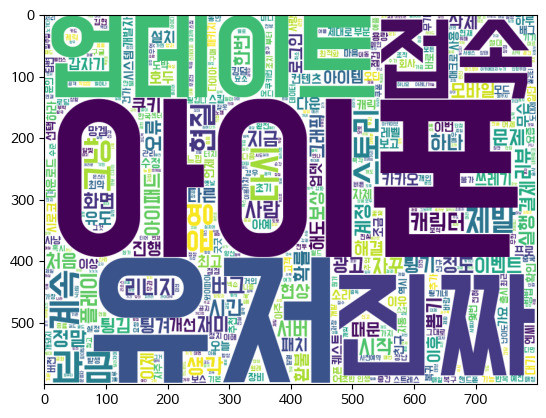

In [72]:
from wordcloud import WordCloud

w=WordCloud(font_path='/content/drive/MyDrive/bytedegree/BMDOHYEON_ttf.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=1000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)

plt.show()

In [73]:
# 긍부정 -> 워드클라우드
# 게임 별 -> 워드클라우드
# 리뷰수가 많은 애들 -> 워드클라우드
# 명사 -> 형용사 , 동사 바꿔나가면서 유저 파악
# TFIDF / COUNT VECTORIZER 가 다른것들을 파악